In [1]:
from selenium.webdriver import Chrome
import time

In [2]:
driver = Chrome('chromedriver')

time.sleep(2)
url = 'https://www.aladin.co.kr/home/wusedshopmain.aspx'
driver.get(url)

time.sleep(2)
# 위치정보 (locate its position/xpath within the xml document)
box_path = '//*[@id="SearchWord"]'
# A 만들기 
box = driver.find_element_by_xpath(box_path)
# A에 대해 B라는 행위(타이핑)를 한다. (do the typing)
box.send_keys('해리 포터')


# 클릭 예시 (execute clicking)
time.sleep(2)
# define xpath
btn_path = '//*[@id="global_search"]/input' 
# create A
btn = driver.find_element_by_xpath(btn_path)
# A에 대해 B라는 행위(클릭)를 한다, execute action B upon A (here, A=btn, B=click)
btn.click()

# recall that selenium does not import the response info requested by the client.
# Thus, just like request.get(url).text used previously, in order to retrieve the information
# from the server, response has to be defined
response = driver.page_source

/Users/sukjinmun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':
/Users/sukjinmun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  from ipykernel import kernelapp as app


In [3]:
# 해당 페이지(알라딘 온라인 중고샵)의 책 제목 출력하는 함수 구현
import bs4

def one_page_all_books(response):
    one_page = bs4.BeautifulSoup(response)
    one_page_all_books = one_page.find_all('div', {'class':'ss_book_box'}) # .select(div.ss_book_box)
    
    book_list = []
    
    for one_book in one_page_all_books:
        midpoint = one_book.find('div', {'class':'ss_book_list'})
        book_list.append(midpoint.find('a', {'class':'bo3'}).find('b').text) # .select(a.bo3 > b)
    return book_list

one_page_all_books(response)

['해리 포터와 마법사의 돌 (미나리마 에디션)',
 '해리 포터와 비밀의 방 (미나리마 에디션)',
 '해리 포터와 마법사의 돌 1 (무선)',
 '해리 포터와 마법사의 돌 2 (무선)',
 '해리 포터와 비밀의 방 1 (무선)',
 '해리 포터와 비밀의 방 2 (무선)',
 '해리 포터 시리즈 1~4편 박스 세트 - 전10권 (무선)',
 '해리 포터와 아즈카반의 죄수 1 (무선)',
 '해리 포터와 아즈카반의 죄수 2 (무선)',
 '해리 포터 시리즈 5~7편 박스 세트 - 전13권 (무선)',
 '해리 포터와 불의 잔 1 (무선)',
 '해리 포터 : 마법사의 돌 (양장)',
 '해리 포터와 불의 잔 2 (무선)',
 '해리 포터와 불의 잔 4 (무선)',
 '해리 포터와 불의 잔 3 (무선)',
 '해리 포터와 비밀의 방 (양장)',
 '해리 포터와 아즈카반의 죄수 (양장)',
 '해리 포터와 저주받은 아이 1, 2부 (양장)',
 '해리 포터와 죽음의 성물 1 (무선)',
 '해리 포터와 죽음의 성물 4 (무선)',
 '해리 포터와 죽음의 성물 2 (무선)',
 '해리 포터와 불의 잔 1 (양장)',
 '해리 포터와 불의 잔 2 (양장)',
 '해리 포터와 죽음의 성물 3 (무선)',
 '해리 포터와 불사조 기사단 1 (무선)']

In [4]:
# 현재 인기있는 책 목록(bestseller 50)
import requests

def best_books():
    url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'
    response = requests.get(url).text
    one_page = bs4.BeautifulSoup(response)
    one_page_all_books = one_page.find_all('div', {'class':'ss_book_box'})
    
    book_list = []

    for one_book in one_page_all_books:
        midpoint = one_book.find('div', {"class":"ss_book_list"})
        book_list.append(midpoint.find('a', {'class':'bo3'}).find('b').text)
    
    return book_list

best_books()

['파친코 1',
 '파친코 2',
 '2022 제13회 젊은작가상 수상작품집',
 '가불 선진국',
 '불편한 편의점 (40만부 기념 벚꽃 에디션)',
 '물고기는 존재하지 않는다',
 '아무도 흔들 수 없는 나라',
 '143층 나무 집',
 '꽃샘바람에 흔들린다면 너는 꽃',
 '얼굴만으론 좋아할 수 없어요 3',
 '운명을 바꾸는 부동산 투자 수업 : 기초편',
 '지리의 힘 2',
 '3월의 라이온 16',
 '여름이 온다',
 '그 해 우리는 포토 에세이',
 '이어령의 마지막 수업',
 '원피스 101',
 '웰씽킹 WEALTHINKING (10만 부 기념 한정판 골드 에디션)',
 '운명을 바꾸는 부동산 투자 수업 : 실전편',
 '도원암귀 4',
 '그림들',
 '마음의 법칙',
 '청춘 블라썸 시즌1 : 1~3 한정판 박스 세트 - 전3권 (굿즈 8종 + 전용수납케이스 포함)',
 '김학렬의 부동산 투자 절대 원칙',
 '거의 모든 행동 표현의 영어',
 '나의 아저씨 1~2 세트 - 전2권',
 '오리 부리 이야기',
 '10배의 법칙',
 '다산의 마지막 질문',
 '극장판 주술회전 0 노벨라이즈',
 '오래되고 멋진 클래식 레코드',
 '롤랑의 노래',
 '어서 오세요, 휴남동 서점입니다',
 '보도 섀퍼의 이기는 습관',
 '놓아주는 엄마 주도하는 아이',
 '흔한남매 불꽃 튀는 우리말 5',
 '열혈강호 85',
 '위대한 국민의 나라',
 '거의 모든 것의 역사',
 '오은영의 화해 (리커버)',
 '저주토끼 (리커버)',
 '소설 보다 : 봄 2022',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)',
 '나는 3학년 2반 7번 애벌레',
 '백광',
 '2022 써니 행정법총론 실전동형 모의고사 - 전2권',
 '2022 써니 행정법총론 단원별 모의고사 - 전2권',
 '루호',
 '세력주 매매 공식',
 '지구 끝의 온실']

In [5]:
# 인기있는 책을 중고로 검색하는 프로그램 제작

driver = Chrome('chromedriver')

url = 'https://www.aladin.co.kr/home/wusedshopmain.aspx'
driver.get(url)

time.sleep(3)
all_results = []
for best_book in best_books():
    box_path = '//*[@id="SearchWord"]' 
    box = driver.find_element_by_xpath(box_path)
    box.clear() # 이전에 검색한 내용이 이후에 검색할 때 이어쓰여짐으로 삭제 후 이후 내용 검색
    box.send_keys(best_book)
    
    btn_path = '//*[@id="global_search"]/input'
    btn = driver.find_element_by_xpath(btn_path)
    btn.click()
    
    time.sleep(3)
    result = one_page_all_books(driver.page_source)
    all_results.append({'best_book':best_book, 'result':result})

/Users/sukjinmun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if sys.path[0] == '':
/Users/sukjinmun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


In [6]:
all_results

[{'best_book': '파친코 1', 'result': ['파친코 1', '[세트] 파친코 1~2 세트 - 전2권']},
 {'best_book': '파친코 2', 'result': ['파친코 2', '[세트] 파친코 1~2 세트 - 전2권']},
 {'best_book': '2022 제13회 젊은작가상 수상작품집', 'result': []},
 {'best_book': '가불 선진국', 'result': ['가불 선진국']},
 {'best_book': '불편한 편의점 (40만부 기념 벚꽃 에디션)',
  'result': ['불편한 편의점 (40만부 기념 벚꽃 에디션)']},
 {'best_book': '물고기는 존재하지 않는다',
  'result': ["Why Fish Don't Exist: A Story of Loss, Love, and the Hidden Order of Life (Paperback)",
   '물고기는 존재하지 않는다']},
 {'best_book': '아무도 흔들 수 없는 나라',
  'result': ['아무도 흔들 수 없는 나라', '아무도 흔들 수 없는 나라']},
 {'best_book': '143층 나무 집', 'result': []},
 {'best_book': '꽃샘바람에 흔들린다면 너는 꽃', 'result': []},
 {'best_book': '얼굴만으론 좋아할 수 없어요 3', 'result': []},
 {'best_book': '운명을 바꾸는 부동산 투자 수업 : 기초편',
  'result': ['운명을 바꾸는 부동산 투자 수업 2권 세트 - 기초편, 실전편', '운명을 바꾸는 부동산 투자 수업 (기초편)']},
 {'best_book': '지리의 힘 2',
  'result': ['영어의 힘 + 지리의 힘 세트 - 전2권', '지리의 힘 + 땅과 집값의 경제학 세트 - 전2권']},
 {'best_book': '3월의 라이온 16', 'result': []},
 {'best_book': '여름이 온

In [7]:
import pandas as pd

df = pd.DataFrame(all_results)
df

,best_book,result
0,파친코 1,"[파친코 1, [세트] 파친코 1~2 세트 - 전2권]"
1,파친코 2,"[파친코 2, [세트] 파친코 1~2 세트 - 전2권]"
2,2022 제13회 젊은작가상 수상작품집,[]
3,가불 선진국,[가불 선진국]
4,불편한 편의점 (40만부 기념 벚꽃 에디션),[불편한 편의점 (40만부 기념 벚꽃 에디션)]
5,물고기는 존재하지 않는다,"[Why Fish Don't Exist: A Story of Loss, Love, ..."
6,아무도 흔들 수 없는 나라,"[아무도 흔들 수 없는 나라, 아무도 흔들 수 없는 나라]"
7,143층 나무 집,[]
8,꽃샘바람에 흔들린다면 너는 꽃,[]
9,얼굴만으론 좋아할 수 없어요 3,[]


In [8]:
df.to_csv('aladin.csv', index=False, encoding='utf-8-sig')

## 법적 권고안
- '권고'이기 때문에 지키지 않아도 법적 문제가 직접적으로 발생하지는 않음
- IP를 밴 하는 것은 서비스 공급자의 자유이므로, 안 당하려면 지켜야함
- robots.txt: 관리자가 사이트를 만들 때, 사이트에서 가져가도 되는지 안되는지에 대한 내용을 기술
- ex) https://www.naver.com/robots.txt yields a downloadable text file as below
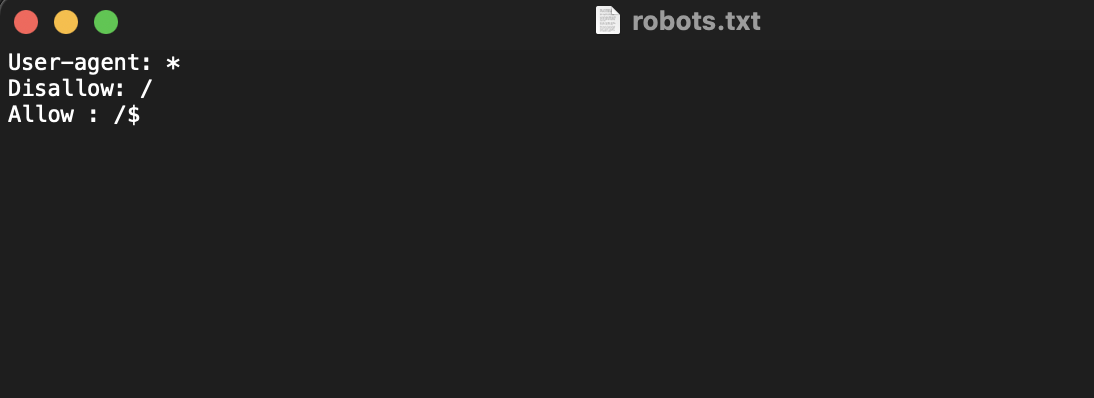

User-agent is the name of the crawler (e.g. if you search stuff in Google's search engine, then Google would be the crawler). In this case, * means it can be accessed from anywhere.
Allow and disallow each represents the regions that are allowed/disallowed to be crawled. 

## robots.txt
- User-Agent: 크롤러의 이름(네이버, 구글 등 포털 사이트)
- Allow: 어느 영역을 허용할지
- Disallow: 어느 영역을 허용하지 않을지
- Crwal-Delay: 최소 몇 초마다 한 번씩 가져가도 되는지(이것보다 빠르면 곤란해요...)

## 법적 문제가 된 예시
- 사람인, 잡코리아 크롤링
- 여기어때, 야놀자 크롤링
- 사람인과 잡코리아 경쟁 업체이고, 사업의 목적이 같음
- 크롤링이라는 행위가 불법이 아니라 그 행위로 인해 상대방의 영위에 영향을 줬다는게 법리적인 해석

#### try to crawl one of the NAVER webtoons